In [2]:
%matplotlib inline
from Simulation import *

# Constants

In [3]:
Detuning = 14E+9
fL =  3.517309021e+14+90E+6+80E+6+Detuning
c = 2.99792458e+8
k = 2*np.pi*fL/c

# Common Functions

Up to 2nd order Hermite Gaussian beam model

In [402]:
This is a test. def Hermite_Gaussian(xz,x0,z0,w0,a,c1,c2):
    x = xz[0]
    z = xz[1]
    zr = k*w0**2/2
    w = w0*np.sqrt(1+(z-z0)**2/zr**2)
    return a*hermite.hermval((x-x0)*np.sqrt(2)/w,[1,c1,c2])*np.exp(-((x-x0)**2)/w**2)

In [513]:
def Hermite_Gaussian2D(xyz,x0,y0,z0,w0,a,cx1,cx2,cy1,cy2):
    x = xyz[0]
    y = xyz[1]
    z = xyz[2]
    zr = k*w0**2/2
    w = w0*np.sqrt(1+(z-z0)**2/zr**2)
    return a*hermite.hermval((x-x0)*np.sqrt(2)/w,[1,cx1,cx2])*hermite.hermval((y-y0)*np.sqrt(2)/w,[1,cy1,cy2])*np.exp(-(x-x0)**2/w**2)*np.exp(-(y-y0)**2/w**2)

In [356]:
def Hermite_Gaussian_slice(x,x0,w,a,c1,c2):
    return a*hermite.hermval((x-x0)*np.sqrt(2)/w,[1,c1,c2])*np.exp(-((x-x0)**2)/w**2)

In [349]:
def Read_Beam1D(filename):
    input_data = np.loadtxt(filename)
    x = input_data[:,0]/10**6
    intensity_x = input_data[:,1]
    y = input_data[:,2]/10**6
    intensity_y = input_data[:,3]
    Ax = np.zeros(len(x))
    Ay = np.zeros(len(y))
    max_x = max(intensity_x)
    max_y = max(intensity_y)
    for i in range(len(x)):
        if intensity_x[i]>0:
            Ax[i] = np.sqrt(intensity_x[i]/max_x)
        if intensity_y[i]>0:
            Ay[i] = np.sqrt(intensity_y[i]/max_y)
    return x, Ax, y, Ay

In [70]:
def Fit_Beam(x_list, z_list, Ax_list, guess = None):
    x = []
    z = []
    Ax = []
    for i in range(len(z_list)):
        x.append(x_list[i])
        z.append(z_list[i]*np.ones(len(x_list[i])))
        Ax.append(Ax_list[i])
    x = np.concatenate(x)
    z = np.concatenate(z)
    Ax = np.concatenate(Ax)
    print(np.shape(x), np.shape(z), np.shape(Ax))
    popt, pcov = curve_fit(Hermite_Gaussian, [x,z], Ax, p0 = guess)
    return popt

In [430]:
def Fit_Beam2D(x_list, y_list, z_list, Ax_list, Ay_list, guess = None):
    x = []
    y = []
    z = []
    A = []
    for i in range(len(z_list)):
        x.append(x_list[i])
        y.append(np.zeros(len(x_list[i])))
        z.append(z_list[i]*np.ones(len(x_list[i])))
        A.append(Ax_list[i])
    for i in range(len(z_list)):
        x.append(np.zeros(len(y_list[i])))
        y.append(y_list[i])
        z.append(z_list[i]*np.ones(len(y_list[i])))
        A.append(Ay_list[i])
    x = np.concatenate(x)
    y = np.concatenate(y)
    z = np.concatenate(z)
    A = np.concatenate(A)
    print(np.shape(x), np.shape(y), np.shape(z), np.shape(A))
    popt, pcov = curve_fit(Hermite_Gaussian2D, [x,y,z], A, p0 = guess)
    return popt

In [7]:
def Fit_Beam_Slice(x, Ax, guess = None):
    popt, pcov = curve_fit(Hermite_Gaussian_slice, x, Ax, p0 = guess)
    return popt

In [86]:
def plot(x, Ax, popt = None):
    if popt is None:
        fig, ax = plt.subplots(1, 1)
        ax.plot(x, Ax, 'b.')
        plt.show()
    else:
        fig, ax = plt.subplots(1, 1)
        ax.plot(x, Ax, 'b.', x, Hermite_Gaussian_slice(x, *popt), 'r-')
        plt.show()

In [514]:
def Plot2D(x, Ax, y, Ay, z, popt = None):
    if popt is None:
        fig, ax = plt.subplots(1, 1)
        ax.plot(x, Ax, 'b-')
        plt.show()
        fig, ax = plt.subplots(1, 1)
        ax.plot(y, Ay, 'b-')
        plt.show()
    else:
        fig, ax = plt.subplots(1, 1)
        ax.plot(x, Ax, 'b-', x, Hermite_Gaussian2D([x,np.zeros(len(x)),z*np.ones(len(x))], *popt), 'r-')
        plt.show()
        fig, ax = plt.subplots(1, 1)
        ax.plot(y, Ay, 'b-', y, Hermite_Gaussian2D([np.zeros(len(y)),y,z*np.ones(len(y))], *popt), 'r-')
        plt.show()

# Data Analysis

In [364]:
x_list = []
y_list = []
z_list = []
Ax_list = []
Ay_list = []
x0_list = []
y0_list = []
wx_list = []
wy_list = []
ax_list = []
ay_list = []
cx_list = []
cy_list = []

## z = 4 inch

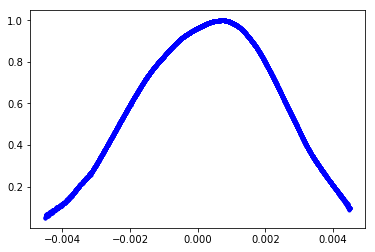

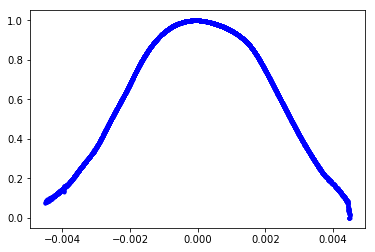

In [365]:
filename = 'beam1d_4.txt'
z = 4*0.0254
x, Ax, y, Ay = Read_Beam1D(filename)
x_list.append(x)
y_list.append(y)
Ax_list.append(Ax)
Ay_list.append(Ay)
z_list.append(z)
plot(x, Ax)
plot(x, Ay)

### Fit x

Optimal Parameters =  [  1.37454466e-04   2.33686631e-03   1.13773317e+00   4.99426257e-02
   6.95761705e-02]


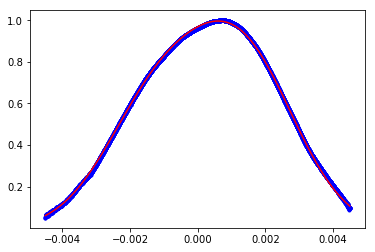

In [366]:
guess = (-1.56782888e-04,   2.24967698e-03,   1.15792394e+00, 4.86633574e-02,   8.78800292e-02)
popt = Fit_Beam_Slice(x, Ax, guess = guess)
print('Optimal Parameters = ', popt)
plot(x, Ax, popt)
x0_list.append(popt[0])
wx_list.append(popt[1])

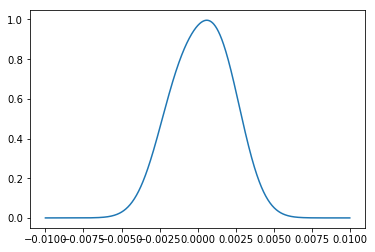

In [367]:
x = np.linspace(-0.01,0.01,1000)
plt.plot(x, Hermite_Gaussian_slice(x,*popt))
plt.show()

### Fit y

Optimal Parameters =  [  9.90250444e-05   2.28347528e-03   1.17978704e+00  -2.05150665e-03
   7.45706441e-02]


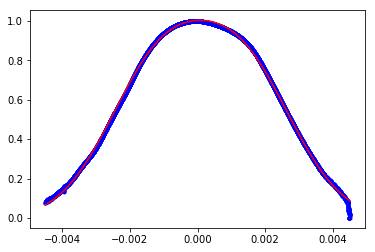

In [368]:
guess = (-1.56782888e-04,   2.24967698e-03,   1.15792394e+00, 4.86633574e-02,   8.78800292e-02)
popt = Fit_Beam_Slice(y, Ay, guess = guess)
print('Optimal Parameters = ', popt)
plot(y, Ay, popt)
y0_list.append(popt[0])
wy_list.append(popt[1])

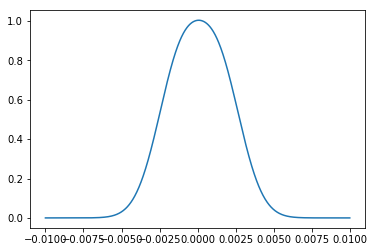

In [369]:
y = np.linspace(-0.01,0.01,1000)
plt.plot(y, Hermite_Gaussian_slice(y,*popt))
plt.show()

## z = 30 inch

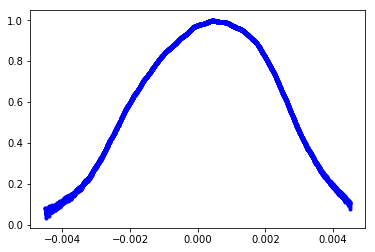

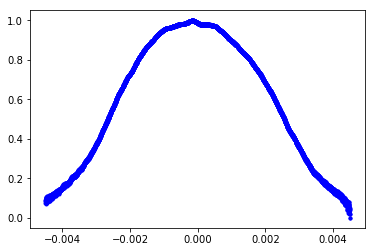

In [370]:
filename = 'beam1d_30.txt'
z = 30*0.0254
x, Ax, y, Ay = Read_Beam1D(filename)
x_list.append(x)
y_list.append(y)
Ax_list.append(Ax)
Ay_list.append(Ay)
z_list.append(z)
plot(x, Ax)
plot(x, Ay)

### Fit x

Optimal Parameters =  [  1.77629442e-04   2.24444411e-03   1.15812840e+00   4.36834789e-02
   7.68211842e-02]


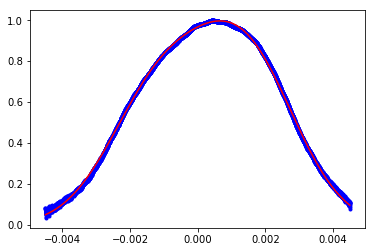

In [371]:
guess = (-1.56782888e-04,   2.24967698e-03,   1.15792394e+00, 4.86633574e-02,   8.78800292e-02)
popt = Fit_Beam_Slice(x, Ax, guess = guess)
print('Optimal Parameters = ', popt)
plot(x, Ax, popt)
x0_list.append(popt[0])
wx_list.append(popt[1])

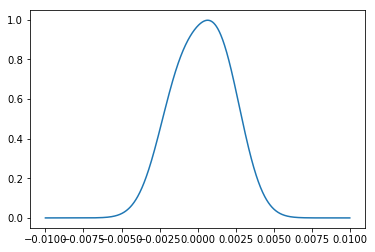

In [372]:
x = np.linspace(-0.01,0.01,1000)
plt.plot(x, Hermite_Gaussian_slice(x,*popt))
plt.show()

### Fit y

Optimal Parameters =  [  1.53134001e-06   2.23291383e-03   1.16720057e+00  -1.87080172e-02
   7.68341175e-02]


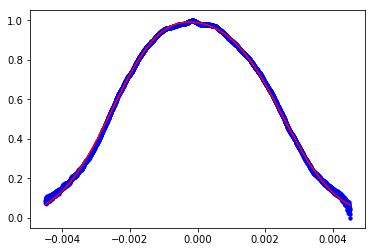

In [373]:
guess = (-1.56782888e-04,   2.24967698e-03,   1.15792394e+00, 4.86633574e-02,   8.78800292e-02)
popt = Fit_Beam_Slice(y, Ay, guess = guess)
print('Optimal Parameters = ', popt)
plot(y, Ay, popt)
y0_list.append(popt[0])
wy_list.append(popt[1])

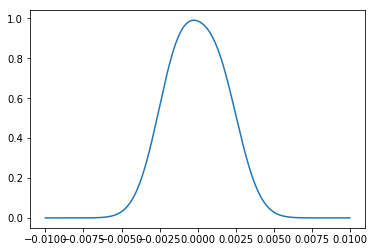

In [374]:
y = np.linspace(-0.01,0.01,1000)
plt.plot(y, Hermite_Gaussian_slice(y,*popt))
plt.show()

## z = 60 inch

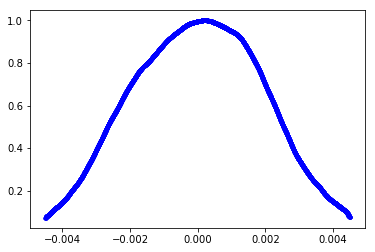

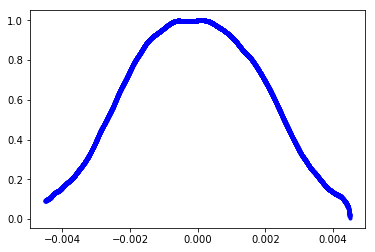

In [375]:
filename = 'beam1d_60.txt'
z = 60*0.0254
x, Ax, y, Ay = Read_Beam1D(filename)
x_list.append(x)
y_list.append(y)
Ax_list.append(Ax)
Ay_list.append(Ay)
z_list.append(z)
plot(x, Ax)
plot(x, Ay)

### Fit x

Optimal Parameters =  [ -1.43972265e-04   2.27395535e-03   1.15406843e+00   3.95287004e-02
   7.33337906e-02]


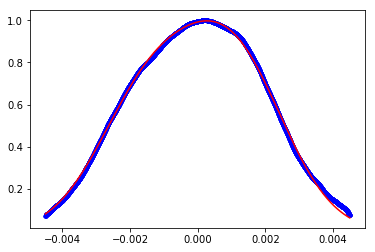

In [376]:
guess = (-1.56782888e-04,   2.24967698e-03,   1.15792394e+00, 4.86633574e-02,   8.78800292e-02)
popt = Fit_Beam_Slice(x, Ax, guess = guess)
print('Optimal Parameters = ', popt)
plot(x, Ax, popt)
x0_list.append(popt[0])
wx_list.append(popt[1])

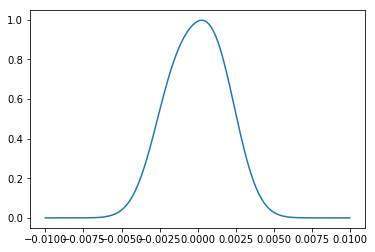

In [377]:
x = np.linspace(-0.01,0.01,1000)
plt.plot(x, Hermite_Gaussian_slice(x,*popt))
plt.show()

### Fit y

Optimal Parameters =  [ -3.27585899e-05   2.23022515e-03   1.18618452e+00  -1.41051974e-02
   7.70698298e-02]


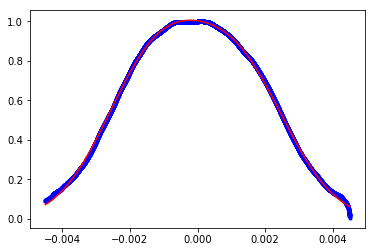

In [378]:
guess = (-1.56782888e-04,   2.24967698e-03,   1.15792394e+00, 4.86633574e-02,   8.78800292e-02)
popt = Fit_Beam_Slice(y, Ay, guess = guess)
print('Optimal Parameters = ', popt)
plot(y, Ay, popt)
y0_list.append(popt[0])
wy_list.append(popt[1])

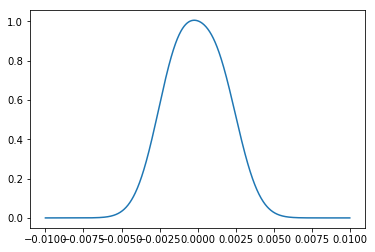

In [379]:
y = np.linspace(-0.01,0.01,1000)
plt.plot(y, Hermite_Gaussian_slice(y,*popt))
plt.show()

## z = 148 inch

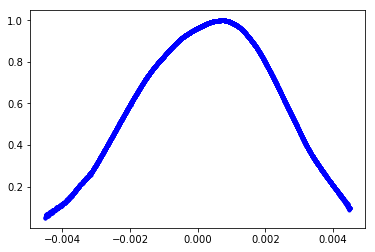

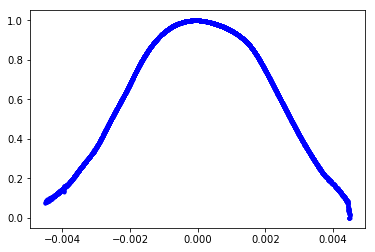

In [380]:
filename = 'beam1d_148.txt'
z = 148*0.0254
x, Ax, y, Ay = Read_Beam1D(filename)
x_list.append(x)
y_list.append(y)
Ax_list.append(Ax)
Ay_list.append(Ay)
z_list.append(z)
plot(x, Ax)
plot(x, Ay)

### Fit x

Optimal Parameters =  [  1.37454466e-04   2.33686631e-03   1.13773317e+00   4.99426257e-02
   6.95761705e-02]


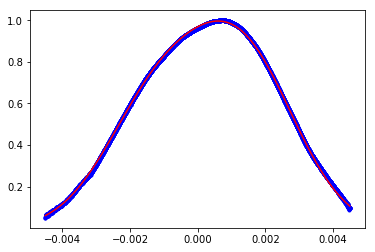

In [381]:
guess = (-1.56782888e-04,   2.24967698e-03,   1.15792394e+00, 4.86633574e-02,   8.78800292e-02)
popt = Fit_Beam_Slice(x, Ax, guess = guess)
print('Optimal Parameters = ', popt)
plot(x, Ax, popt)
x0_list.append(popt[0])
wx_list.append(popt[1])

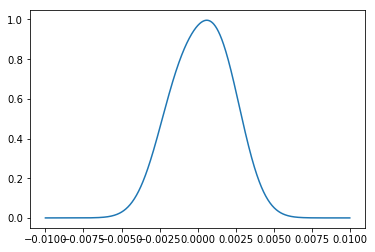

In [382]:
x = np.linspace(-0.01,0.01,1000)
plt.plot(x, Hermite_Gaussian_slice(x,*popt))
plt.show()

### Fit y

Optimal Parameters =  [  9.90250444e-05   2.28347528e-03   1.17978704e+00  -2.05150665e-03
   7.45706441e-02]


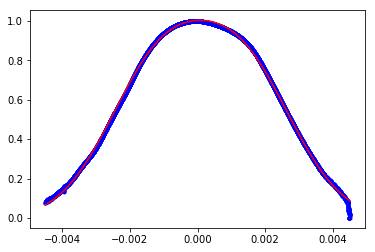

In [383]:
guess = (-1.56782888e-04,   2.24967698e-03,   1.15792394e+00, 4.86633574e-02,   8.78800292e-02)
popt = Fit_Beam_Slice(y, Ay, guess = guess)
print('Optimal Parameters = ', popt)
plot(y, Ay, popt)
y0_list.append(popt[0])
wy_list.append(popt[1])

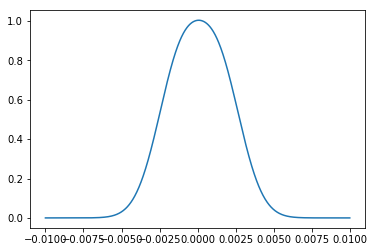

In [384]:
y = np.linspace(-0.01,0.01,1000)
plt.plot(y, Hermite_Gaussian_slice(y,*popt))
plt.show()

## z = 184 inch

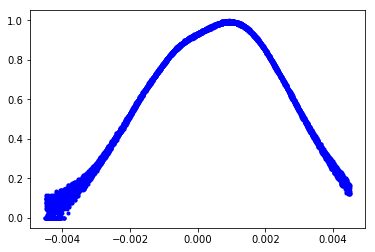

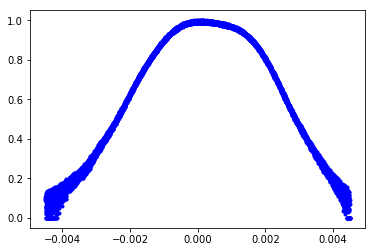

In [385]:
filename = 'beam1d_184.txt'
z = 184*0.0254
x, Ax, y, Ay = Read_Beam1D(filename)
x_list.append(x)
y_list.append(y)
Ax_list.append(Ax)
Ay_list.append(Ay)
z_list.append(z)
plot(x, Ax)
plot(x, Ay)

### Fit x

Optimal Parameters =  [  3.78707209e-04   2.36774741e-03   1.12413470e+00   4.65941049e-02
   6.70418279e-02]


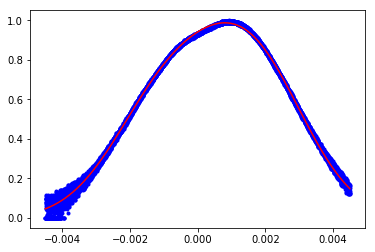

In [386]:
guess = (-1.56782888e-04,   2.24967698e-03,   1.15792394e+00, 4.86633574e-02,   8.78800292e-02)
popt = Fit_Beam_Slice(x, Ax, guess = guess)
print('Optimal Parameters = ', popt)
plot(x, Ax, popt)
x0_list.append(popt[0])
wx_list.append(popt[1])

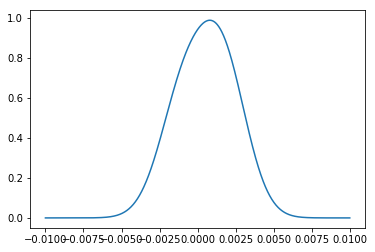

In [387]:
x = np.linspace(-0.01,0.01,1000)
plt.plot(x, Hermite_Gaussian_slice(x,*popt))
plt.show()

### Fit y

Optimal Parameters =  [  1.90455732e-04   2.29214585e-03   1.17468779e+00   1.60343744e-02
   7.44716028e-02]


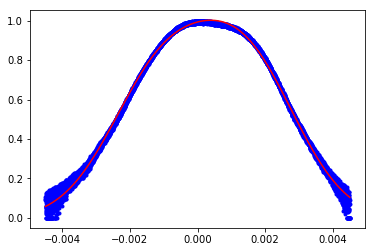

In [388]:
guess = (-1.56782888e-04,   2.24967698e-03,   1.15792394e+00, 4.86633574e-02,   8.78800292e-02)
popt = Fit_Beam_Slice(y, Ay, guess = guess)
print('Optimal Parameters = ', popt)
plot(y, Ay, popt)
y0_list.append(popt[0])
wy_list.append(popt[1])

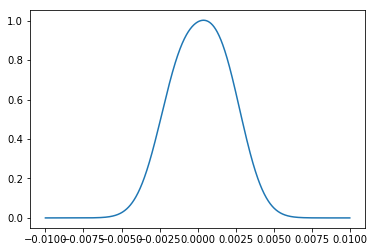

In [389]:
y = np.linspace(-0.01,0.01,1000)
plt.plot(y, Hermite_Gaussian_slice(y,*popt))
plt.show()

## z = 217 inch

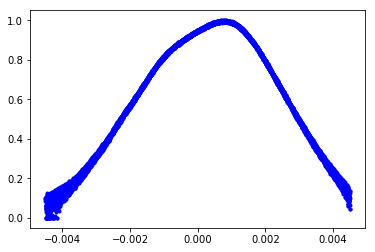

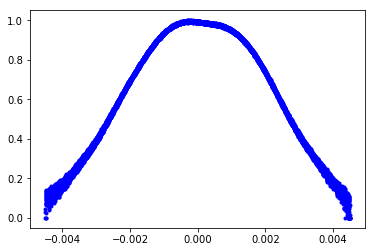

In [390]:
filename = 'beam1d_217.txt'
z = 217*0.0254
x, Ax, y, Ay = Read_Beam1D(filename)
x_list.append(x)
y_list.append(y)
Ax_list.append(Ax)
Ay_list.append(Ay)
z_list.append(z)
plot(x, Ax)
plot(x, Ay)

### Fit x

Optimal Parameters =  [  1.57785023e-04   2.44278503e-03   1.10729871e+00   5.60093215e-02
   6.18435435e-02]


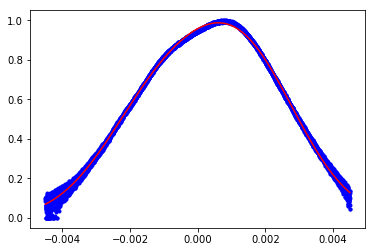

In [395]:
guess = (-1.56782888e-04,   2.24967698e-03,   1.15792394e+00, 4.86633574e-02,   8.78800292e-02)
popt = Fit_Beam_Slice(x, Ax, guess = guess)
print('Optimal Parameters = ', popt)
plot(x, Ax, popt)
x0_list.append(popt[0])
wx_list.append(popt[1])

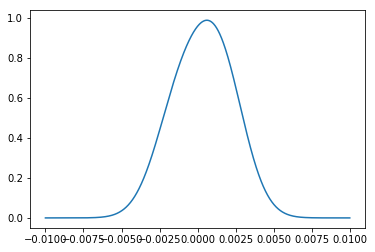

In [396]:
x = np.linspace(-0.01,0.01,1000)
plt.plot(x, Hermite_Gaussian_slice(x,*popt))
plt.show()

### Fit y

Optimal Parameters =  [  2.75522678e-05   2.37816408e-03   1.16126707e+00   6.56993721e-03
   6.85232298e-02]


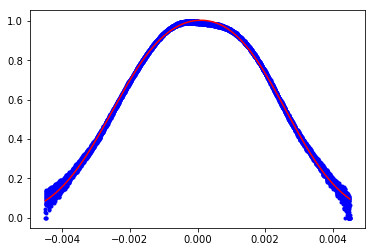

In [397]:
guess = (-1.56782888e-04,   2.24967698e-03,   1.15792394e+00, 4.86633574e-02,   8.78800292e-02)
popt = Fit_Beam_Slice(y, Ay, guess = guess)
print('Optimal Parameters = ', popt)
plot(y, Ay, popt)
y0_list.append(popt[0])
wy_list.append(popt[1])

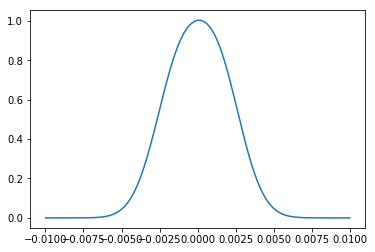

In [398]:
y = np.linspace(-0.01,0.01,1000)
plt.plot(y, Hermite_Gaussian_slice(y,*popt))
plt.show()

## Retro

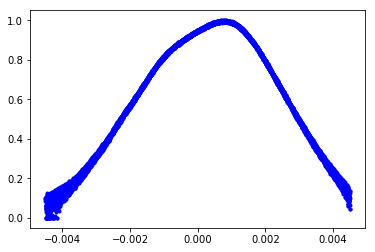

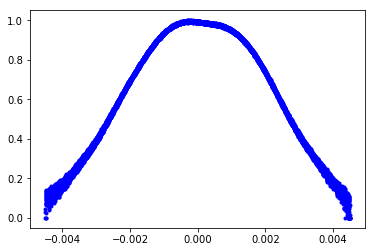

In [506]:
filename = 'beam1d_217.txt'
z = 217*0.0254
x, Ax, y, Ay = Read_Beam1D(filename)
x_list.append(x)
y_list.append(y)
Ax_list.append(Ax)
Ay_list.append(Ay)
z_list.append(z)
plot(x, Ax)
plot(x, Ay)

### Fit x

Optimal Parameters =  [  1.57785023e-04   2.44278503e-03   1.10729871e+00   5.60093215e-02
   6.18435435e-02]


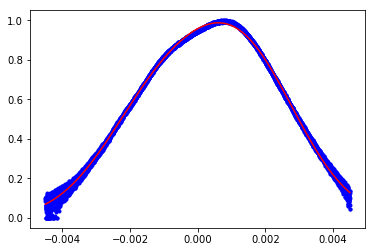

In [507]:
guess = (-1.56782888e-04,   2.24967698e-03,   1.15792394e+00, 4.86633574e-02,   8.78800292e-02)
popt = Fit_Beam_Slice(x, Ax, guess = guess)
print('Optimal Parameters = ', popt)
plot(x, Ax, popt)
x0_list.append(popt[0])
wx_list.append(popt[1])

In [511]:
z = 198*0.0254
model = np.array([4.78097350e-06, -7.24657061e-08, 0.76782505, 2.28686925e-03, 1.35242281e+00, 4.62100412e-02, 7.02165400e-02, -2.27776297e-03, 7.45464943e-02])

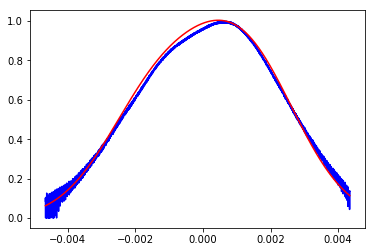

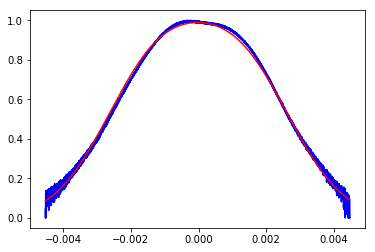

In [517]:
i = 6
Plot2D(x_list[i]-1.57785023e-04, Ax_list[i], y_list[i]-2.75522678e-05, Ay_list[i], z, model)

### Fit y

Optimal Parameters =  [  2.75522678e-05   2.37816408e-03   1.16126707e+00   6.56993721e-03
   6.85232298e-02]


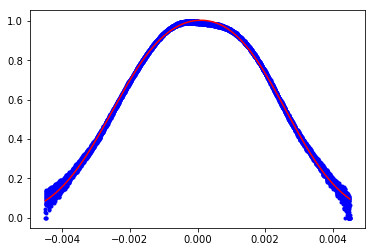

In [509]:
guess = (-1.56782888e-04,   2.24967698e-03,   1.15792394e+00, 4.86633574e-02,   8.78800292e-02)
popt = Fit_Beam_Slice(y, Ay, guess = guess)
print('Optimal Parameters = ', popt)
plot(y, Ay, popt)
y0_list.append(popt[0])
wy_list.append(popt[1])

# Fit Overall X

In [399]:
x0_list

[0.00013745446622094671,
 0.00017762944244418351,
 -0.0001439722651989563,
 0.00013745446622094671,
 0.00037870720909675585,
 0.000157785022538836]

In [400]:
wx_list

[0.0023368663057153397,
 0.0022444441129471611,
 0.0022739553479439348,
 0.0023368663057153397,
 0.0023677474054026181,
 0.0024427850268199588]

In [404]:
z_list

[0.1016, 0.762, 1.524, 3.7592, 4.6735999999999995, 5.5118]

In [405]:
np.shape(x_list)

(6, 7500)

In [401]:
for i in range(len(x_list)):
    x_list[i] = x_list[i]-x0_list[i]

In [406]:
guess = (0,   1,   0.0023846866263035576,   1,   -0.15615745,  0.06806187)

In [407]:
popt = Fit_Beam(x_list, z_list, Ax_list, guess = guess)
print(popt)

(45000,) (45000,) (45000,)
[  4.48349889e-08   1.96973858e+00   2.31713046e-03   1.13680273e+00
   4.75770931e-02   6.98299574e-02]


In [408]:
x0 = popt[0]
z0 = popt[1]
w0 = popt[2]
zr = k*w0**2/2

0.1016 0.00232743095966


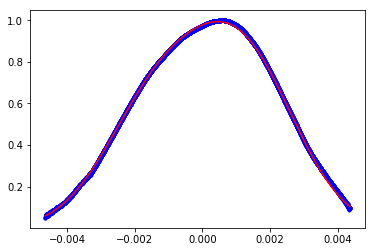

In [409]:
z = z_list[0]
w = w0*np.sqrt(1+(z-z0)**2/zr**2)
print(z, w)
p = np.concatenate([[x0], [w], popt[3:]])
plot(x_list[0], Ax_list[0], p)

0.762 0.00232144114898


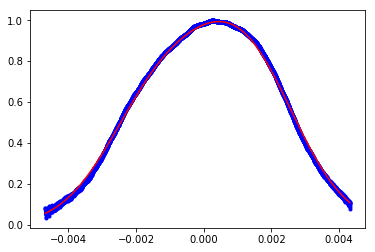

In [410]:
z = z_list[1]
w = w0*np.sqrt(1+(z-z0)**2/zr**2)
print(z, w)
p = np.concatenate([[x0], [w], popt[3:]])
plot(x_list[1], Ax_list[1], p)

1.524 0.00231771810186


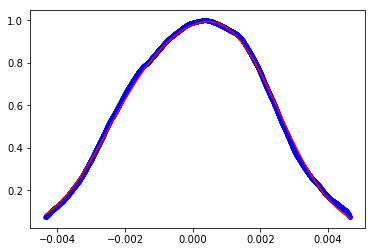

In [411]:
z = z_list[2]
w = w0*np.sqrt(1+(z-z0)**2/zr**2)
print(z, w)
p = np.concatenate([[x0], [w], popt[3:]])
plot(x_list[2], Ax_list[2], p)

3.7592 0.00232658333846


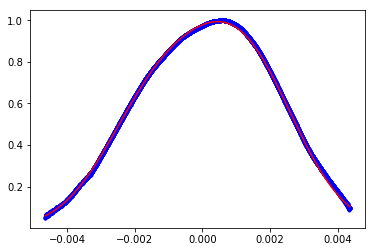

In [412]:
z = z_list[3]
w = w0*np.sqrt(1+(z-z0)**2/zr**2)
print(z, w)
p = np.concatenate([[x0], [w], popt[3:]])
plot(x_list[3], Ax_list[3], p)

4.6735999999999995 0.00233865631967


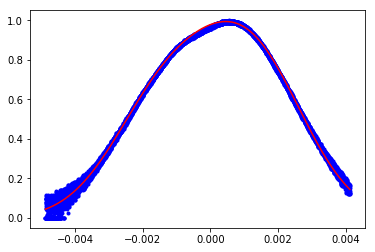

In [413]:
z = z_list[4]
w = w0*np.sqrt(1+(z-z0)**2/zr**2)
print(z, w)
p = np.concatenate([[x0], [w], popt[3:]])
plot(x_list[4], Ax_list[4], p)

5.5118 0.00235395009774


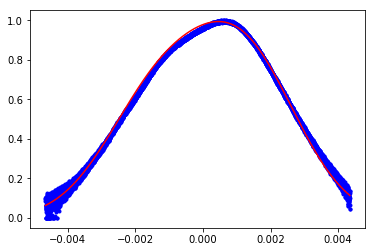

In [414]:
z = z_list[5]
w = w0*np.sqrt(1+(z-z0)**2/zr**2)
print(z, w)
p = np.concatenate([[x0], [w], popt[3:]])
plot(x_list[5], Ax_list[5], p)

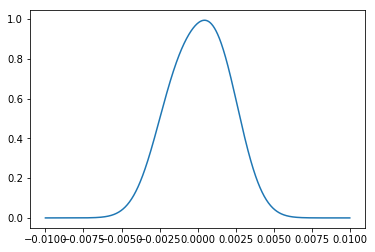

In [415]:
p = np.concatenate([[x0], [w], popt[3:]])
x = np.linspace(-0.01,0.01,1000)
plt.plot(x, Hermite_Gaussian_slice(x,*p))
plt.show()

# Fit Overall Y

In [416]:
wy_list

[0.0022834752773777263,
 0.0022329138320122698,
 0.0022302251462736149,
 0.0022834752773777263,
 0.0022921458462287947,
 0.0023781640805638177]

In [417]:
y0_list

[9.9025044388257252e-05,
 1.5313400071128132e-06,
 -3.275858992289428e-05,
 9.9025044388257252e-05,
 0.0001904557318994561,
 2.7552267795973608e-05]

In [418]:
for i in range(len(y_list)):
    y_list[i] = y_list[i]-y0_list[i]

In [419]:
guess = [-1.16051800e-04,  1, 2.38548144e-03 ,  1.08346122e+00, -1.78218269e-01, 7.03107386e-02]

In [420]:
popt = Fit_Beam(y_list, z_list, Ay_list, guess = guess)
print(popt)

(45000,) (45000,) (45000,)
[ -5.87632238e-07   1.24488574e+00   2.26166932e-03   1.17508103e+00
  -2.15082544e-03   7.44671140e-02]


In [421]:
y0 = popt[0]
z0 = popt[1]
w0 = popt[2]
zr = k*w0**2/2

0.1016 0.00226582343915


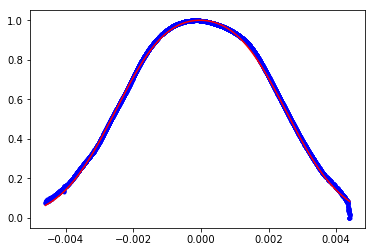

In [422]:
z = z_list[0]
w = w0*np.sqrt(1+(z-z0)**2/zr**2)
print(z, w)
p = np.concatenate([[y0], [w], popt[3:]])
plot(y_list[0], Ay_list[0], p)

0.762 0.00226241094504


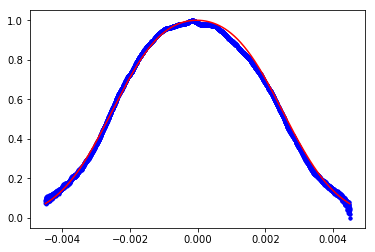

In [424]:
z = z_list[1]
w = w0*np.sqrt(1+(z-z0)**2/zr**2)
print(z, w)
p = np.concatenate([[y0], [w], popt[3:]])
plot(y_list[1], Ay_list[1], p)

1.524 0.00226191712161


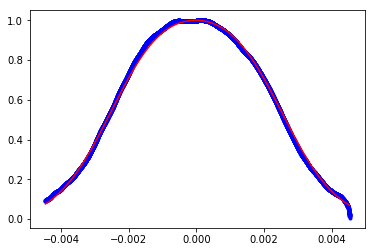

In [425]:
z = z_list[2]
w = w0*np.sqrt(1+(z-z0)**2/zr**2)
print(z, w)
p = np.concatenate([[y0], [w], popt[3:]])
plot(y_list[2], Ay_list[2], p)

3.7592 0.00228169048457


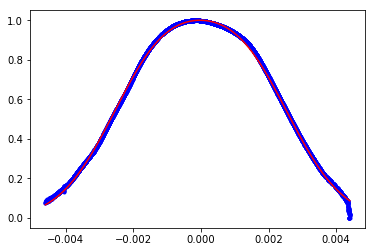

In [426]:
z = z_list[3]
w = w0*np.sqrt(1+(z-z0)**2/zr**2)
print(z, w)
p = np.concatenate([[y0], [w], popt[3:]])
plot(y_list[3], Ay_list[3], p)

4.6735999999999995 0.00229876164672


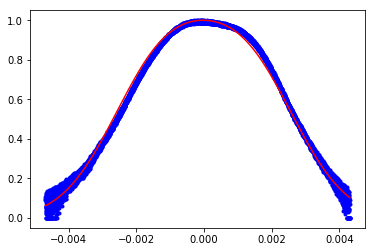

In [427]:
z = z_list[4]
w = w0*np.sqrt(1+(z-z0)**2/zr**2)
print(z, w)
p = np.concatenate([[y0], [w], popt[3:]])
plot(y_list[4], Ay_list[4], p)

5.5118 0.00231886185864


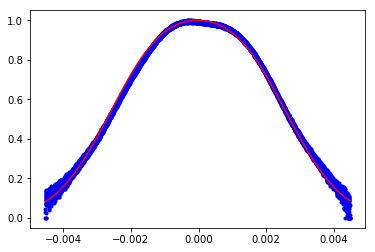

In [428]:
z = z_list[5]
w = w0*np.sqrt(1+(z-z0)**2/zr**2)
print(z, w)
p = np.concatenate([[y0], [w], popt[3:]])
plot(y_list[5], Ay_list[5], p)

# Fit All in One

In [492]:
guess = [0, 0,  2, 2.38548144e-03 ,  1.08346122e+00, -1.78218269e-01, 7.03107386e-02, -0.36220332,  0.11730243, ]

In [493]:
popt = Fit_Beam2D(x_list, y_list, z_list, Ax_list, Ay_list, guess = guess)
print(popt)

(90000,) (90000,) (90000,) (90000,)
[  4.78097350e-06  -7.24657061e-08   1.59196446e+00   2.28686925e-03
   1.35242281e+00   4.62100412e-02   7.02165400e-02  -2.27776297e-03
   7.45464943e-02]


In [494]:
x0 = popt[0]
y0 = popt[1]
z0 = popt[2]
p = popt[4:]

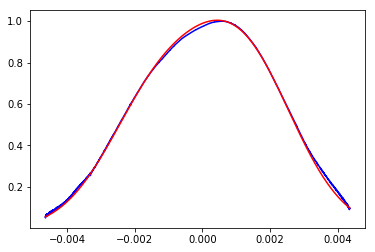

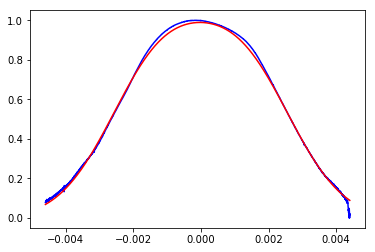

In [495]:
i = 0
z = z_list[i]
Plot2D(x_list[i], Ax_list[i], y_list[i], Ay_list[i], z, popt)

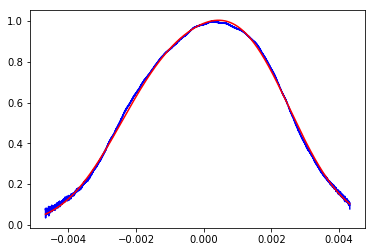

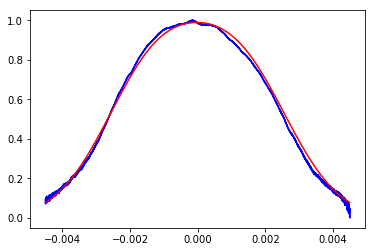

In [496]:
i = 1
z = z_list[i]
Plot2D(x_list[i], Ax_list[i], y_list[i], Ay_list[i], z, popt)

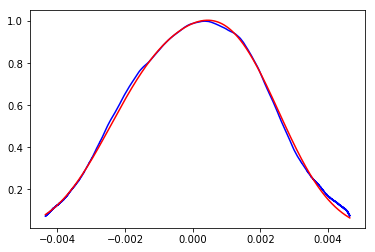

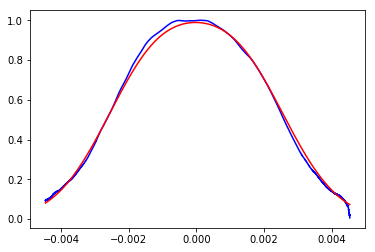

In [497]:
i = 2
z = z_list[i]
Plot2D(x_list[i], Ax_list[i], y_list[i], Ay_list[i], z, popt)

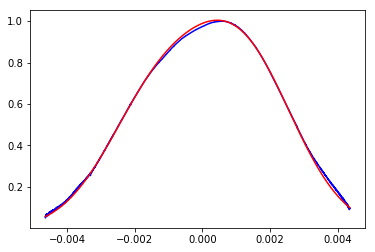

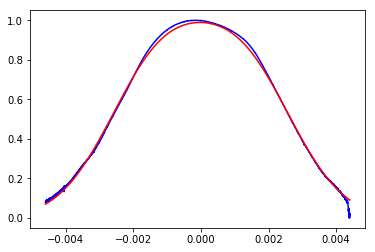

In [498]:
i = 3
z = z_list[i]
Plot2D(x_list[i], Ax_list[i], y_list[i], Ay_list[i], z, popt)

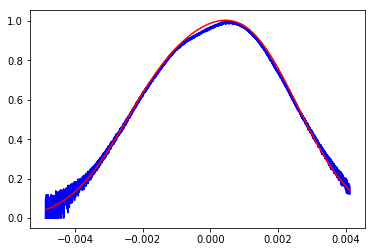

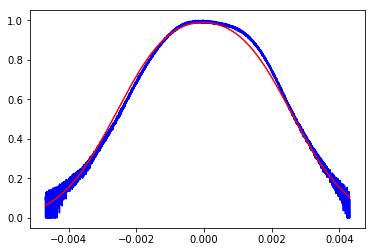

In [499]:
i = 4
z = z_list[i]
Plot2D(x_list[i], Ax_list[i], y_list[i], Ay_list[i], z, popt)

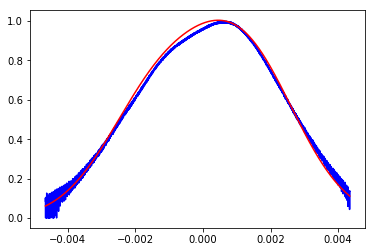

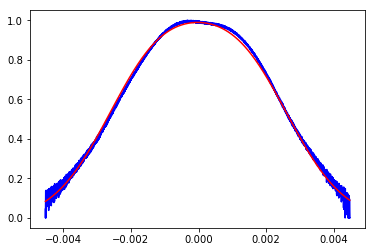

In [500]:
i = 5
z = z_list[i]
Plot2D(x_list[i], Ax_list[i], y_list[i], Ay_list[i], z, popt)

In [322]:
np.array(z_list)-0.7874

array([-0.6858, -0.0254,  0.7366,  2.9718,  3.8862,  4.7244])

# On-Axis Gouy Phase

In [6]:
v_2nd_Bragg = 2.0480821101976
g = 9.79958

In [7]:
def z_fountain(t):
    z = v_2nd_Bragg*t-0.5*g*t**2
    z0 = v_2nd_Bragg*(1.12-1.32)-0.5*g*(1.12-1.32)**2
    return z-z0

In [503]:
popt

array([  4.78097350e-06,  -7.24657061e-08,   1.59196446e+00,
         2.28686925e-03,   1.35242281e+00,   4.62100412e-02,
         7.02165400e-02,  -2.27776297e-03,   7.45464943e-02])

## Bloch_up

In [504]:
z = z_fountain(0.005)
popt[2] = 1.59196446e+00-31*0.0254
print(popt[2])

0.80456446


In [473]:
z_fountain(0.005)

0.6157259378405078

In [474]:
h = 0.00001

In [475]:
A0 = Hermite_Gaussian2D([0,0,z],0,0,*popt[2:])

In [476]:
Dxx = (Hermite_Gaussian2D([h,0,z],0,0,*popt[2:])+Hermite_Gaussian2D([-h,0,z],0,0,*popt[2:])-2*Hermite_Gaussian2D([0,0,z],0,0,*popt[2:]))/h**2

In [477]:
Dyy = (Hermite_Gaussian2D([0,h,z],0,0,*popt[2:])+Hermite_Gaussian2D([0,-h,z],0,0,*popt[2:])-2*Hermite_Gaussian2D([0,0,z],0,0,*popt[2:]))/h**2

In [478]:
Gouy_up = (Dxx+Dyy)/A0/2/k**2
print(Gouy_up)

-2.27144677895e-09


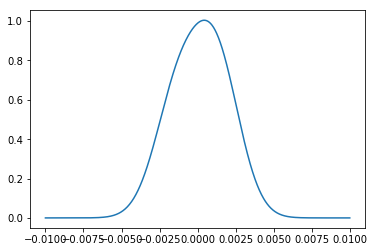

In [479]:
x = np.linspace(-0.01,0.01,1000)
val = np.zeros(1000)
for i in range(1000):
    val[i] = Hermite_Gaussian2D([x[i],0,z],0,0,*popt[2:])
plt.plot(y, val)
plt.show()

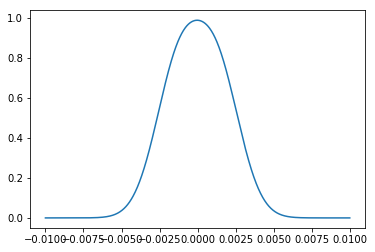

In [480]:
y = np.linspace(-0.01,0.01,1000)
val = np.zeros(1000)
for i in range(1000):
    val[i] = Hermite_Gaussian2D([0,y[i],z],0,0,*popt[2:])
plt.plot(y, val)
plt.show()

## Bloch_down

In [481]:
z = 65*2*0.0254-z_fountain(0.005)
popt[2] = 1.55522505e+00-31*0.0254
print(popt[2])

0.76782505


In [482]:
z

2.6862740621594923

In [483]:
h = 0.00001

In [484]:
A0 = Hermite_Gaussian2D([0,0,z],0,0,*popt[2:])

In [485]:
Dxx = (Hermite_Gaussian2D([h,0,z],0,0,*popt[2:])+Hermite_Gaussian2D([-h,0,z],0,0,*popt[2:])-2*Hermite_Gaussian2D([0,0,z],0,0,*popt[2:]))/h**2

In [486]:
Dyy = (Hermite_Gaussian2D([0,h,z],0,0,*popt[2:])+Hermite_Gaussian2D([0,-h,z],0,0,*popt[2:])-2*Hermite_Gaussian2D([0,0,z],0,0,*popt[2:]))/h**2

In [487]:
Gouy_up = (Dxx+Dyy)/A0/2/k**2
print(Gouy_up)

-2.24931026495e-09


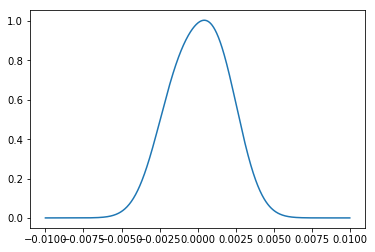

In [488]:
x = np.linspace(-0.01,0.01,1000)
val = np.zeros(1000)
for i in range(1000):
    val[i] = Hermite_Gaussian2D([x[i],0,z],0,0,*popt[2:])
plt.plot(y, val)
plt.show()

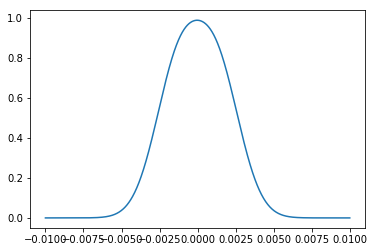

In [489]:
y = np.linspace(-0.01,0.01,1000)
val = np.zeros(1000)
for i in range(1000):
    val[i] = Hermite_Gaussian2D([0,y[i],z],0,0,*popt[2:])
plt.plot(y, val)
plt.show()

In [505]:
(-2.249-2.271)/2

-2.26

In [11]:
z_fountain(0.005)/0.0254+31

55.2411786551381

In [12]:
(65*2*0.0254-z_fountain(0.005))/0.0254+31

136.7588213448619

In [15]:
(z_fountain(0.02+0.06)+250*0.0035*(0.015+0.06))/0.0254+31

62.64255649036724

In [16]:
(65*2*0.0254-(z_fountain(0.02+0.06)+250*0.0035*(0.015+0.06)))/0.0254+31

129.35744350963276

In [17]:
(z_fountain(0.02+0.06)-250*0.0035*(0.015+0.06))/0.0254+31

57.47523365572157

In [18]:
(65*2*0.0254-(z_fountain(0.02+0.06)-250*0.0035*(0.015+0.06)))/0.0254+31

134.52476634427845

In [14]:
z_fountain(0.02+0.06)

0.7380959348553278